## Fake news detection using PassiveAggressiveClassifier

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
df.shape

(6335, 4)

In [6]:
import seaborn as sns

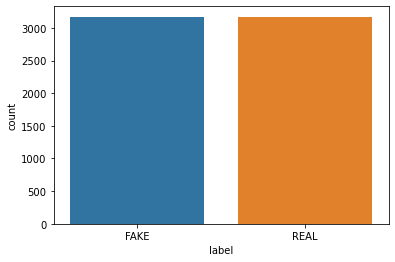

In [7]:
sns.countplot(x=df["label"],data=df)

In [8]:
X=df["text"]
Y=df["label"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf_v=TfidfVectorizer(stop_words="english",max_df=0.7)

In [13]:
# for example , max_df=0.5 : tells the vectorizer to ignore words that appear in more than 50% of the documents .
# max_df=40 : tells the vectorizer to ignore words that appear in more than 40 documents

In [14]:
# min_df=0.01 , tells to ignore words that appear in less than 1% of documents .

In [15]:
train=tfidf_v.fit_transform(x_train)
test=tfidf_v.transform(x_test)

In [16]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [17]:
pac=PassiveAggressiveClassifier(max_iter=75)

In [18]:
pac.fit(train,y_train)

PassiveAggressiveClassifier(max_iter=75)

In [19]:
preds=pac.predict(test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       636
        REAL       0.94      0.94      0.94       631

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [22]:
print(accuracy_score(preds,y_test)*100)

94.39621152328334


In [23]:
c=confusion_matrix(preds,y_test)

In [24]:
c

array([[601,  35],
       [ 36, 595]], dtype=int64)

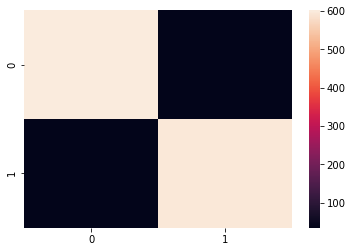

In [25]:
sns.heatmap(c)

In [26]:
print(tfidf_v.get_feature_names())

['00', '000', '0000', '000000031', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km', '001', '0011', '003', '004', '004s', '005', '005s', '006', '00684', '006s', '007', '007s', '008', '008s', '009', '0099', '00am', '00p', '00pm', '01', '010', '011', '012', '013c2812c9', '014', '015', '016', '018', '01am', '02', '020', '022', '023', '024', '025', '027', '02714', '028', '02870', '02welcome', '03', '031', '032', '0325', '033', '034', '035', '037', '03747', '039', '04', '040', '0400', '042', '044', '047', '048', '049', '04pm', '05', '050', '0509245d29', '053', '056', '058', '06', '0600', '062', '063', '0640', '066', '068', '06pm', '07', '0700', '071', '075', '0750', '076', '079', '07dryempjx', '08', '080', '081', '082', '084', '0843', '085', '0851', '089', '0891', '09', '091', '093', '098263', '09am', '09pm', '0_65b67362bd', '0_jgdktlmn', '0a_merrill', '0b6njlny5j', '0d', '0dpbdk6rjd', '0hour', '0hq3vb2giv', '0in', '0jsn6pjkan', '0pt', '0womdwalmi', '10', '100', '1000', '10

In [27]:
print(tfidf_v.get_stop_words())
# stop words = telling to ignore those words. 

frozenset({'all', 'after', 'seem', 'might', 'fifteen', 'an', 'thence', 'bill', 'along', 'side', 'whereas', 'that', 'hereupon', 'former', 'ltd', 'of', 'sixty', 'only', 'also', 'herself', 'done', 'show', 'everyone', 'noone', 'sometime', 'thru', 'besides', 'than', 'they', 'between', 'therefore', 'anyone', 'least', 'put', 'mill', 'becomes', 'whom', 'how', 'anything', 'out', 'thereafter', 'thereby', 'i', 'go', 'call', 'always', 'indeed', 'such', 'empty', 'other', 'seemed', 'whole', 'me', 'was', 'whose', 'behind', 'un', 'these', 'every', 'ourselves', 'even', 'whither', 'too', 'everything', 'yourself', 'co', 'whence', 'one', 'amount', 'give', 'con', 'thick', 'be', 'already', 'because', 'some', 'four', 'a', 'latterly', 'together', 'elsewhere', 'thin', 'throughout', 'afterwards', 'well', 'yours', 'two', 'so', 'somewhere', 'mostly', 'thus', 'nor', 'amongst', 'became', 'via', 'may', 'moreover', 'everywhere', 'nobody', 'themselves', 'him', 'who', 'back', 'become', 'almost', 'something', 'neither',